# Different Configuration Using Maro's Kmeans

This Notebook aimed at replicating Maro's work in the parper Mid-air Gesture Recognition Using Event-Based Vision Sensor

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from HOTS.Monitor import GenerateAM, DisplayAM
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer, FilterNHBD
from HOTS.Monitor import DisplayImage, DisplaySurface3D, DisplaySurface2D, DisplayConvergence
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.Cluster import KmeansMaro

## Defining Common parameter

In [3]:
tau = 0.02
R = 2
nb_cluster = 4
ImageSize = (32,32)
KN=2
DataPath = '../Data/ExtractedStabilized.mat'
LabelPath = '../Data/alphabet_label.pkl'

## Exp1 :  Maro Kmeans + Linear Kernel +  NoiseFilter(=2) + One Polarity in Input + 3 Cycles

In [4]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_02_MaroKmeans/Exp1_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_02_MaroKmeans/Exp1_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 87.50% 
 Normalized Norm 87.50%             
 BattachaNorm 90.00%


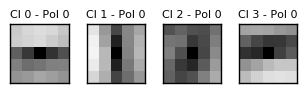

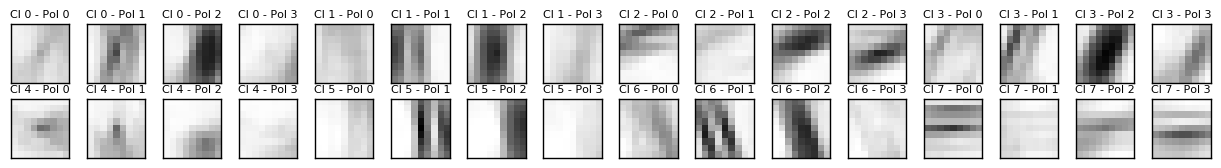

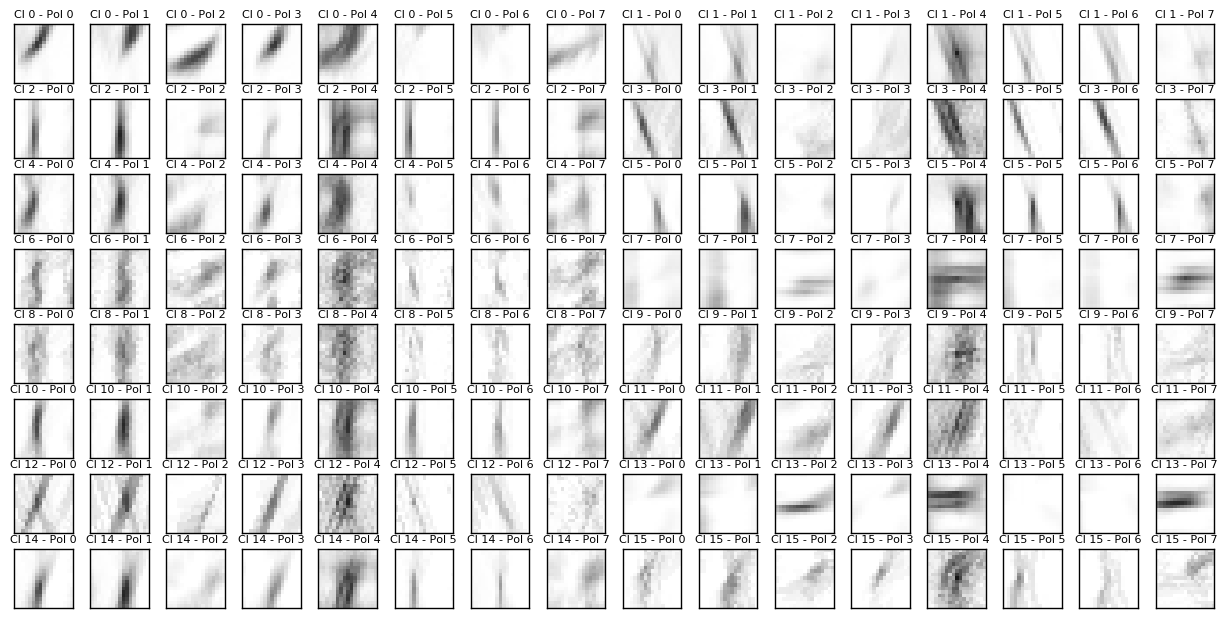

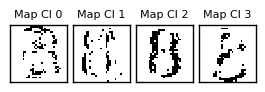

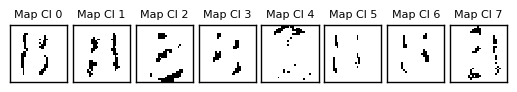

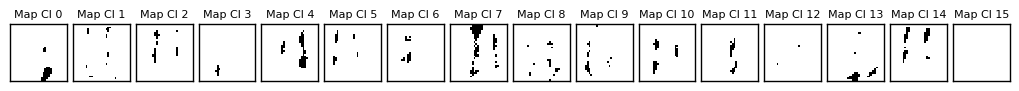

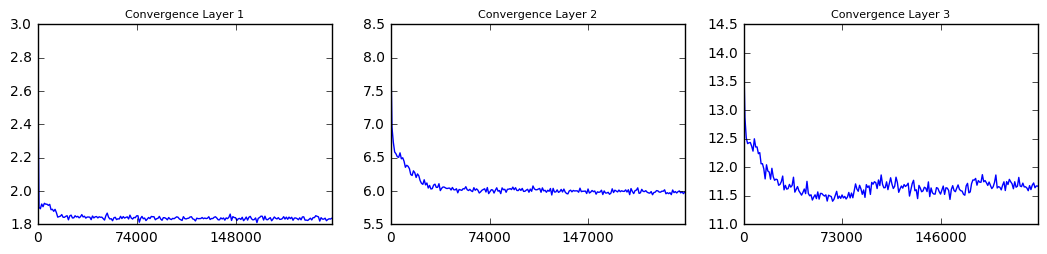

In [5]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

The classification is highly varying with the number of training cycle (event at convergence). This may be cause by the noise on the convergence curve. An hypothesis, could be that the learning coefficient may be too high to reach to a stable convergence

## Exp2 : Maro Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles


In [6]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                            Path=DataPath, LabelPath=LabelPath,
                                                            ClusteringData=[1, 32, 19, 22, 29],
                                                            OutOnePolarity = False, verbose=0)


## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='linear')
Net = Network([L1,L2,L3])


if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000,NbCycle=3)
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)
    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)
    eucli,norma,battach,accu = Classif0.HistogramDistance()
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_02_MaroKmeans/Exp2_2017_10_18.pkl')
else :
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_02_MaroKmeans/Exp2_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 80.00% 
 Normalized Norm 80.00%             
 BattachaNorm 80.00%


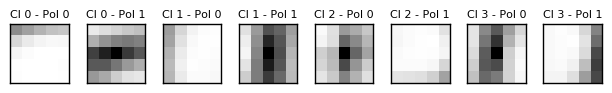

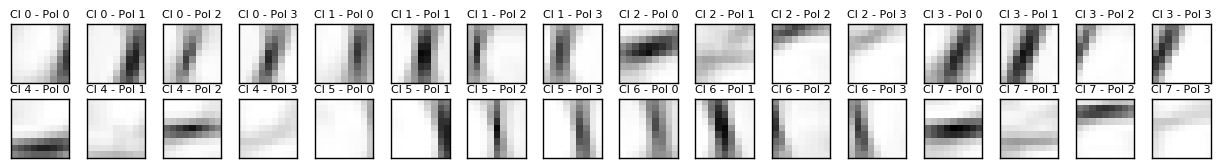

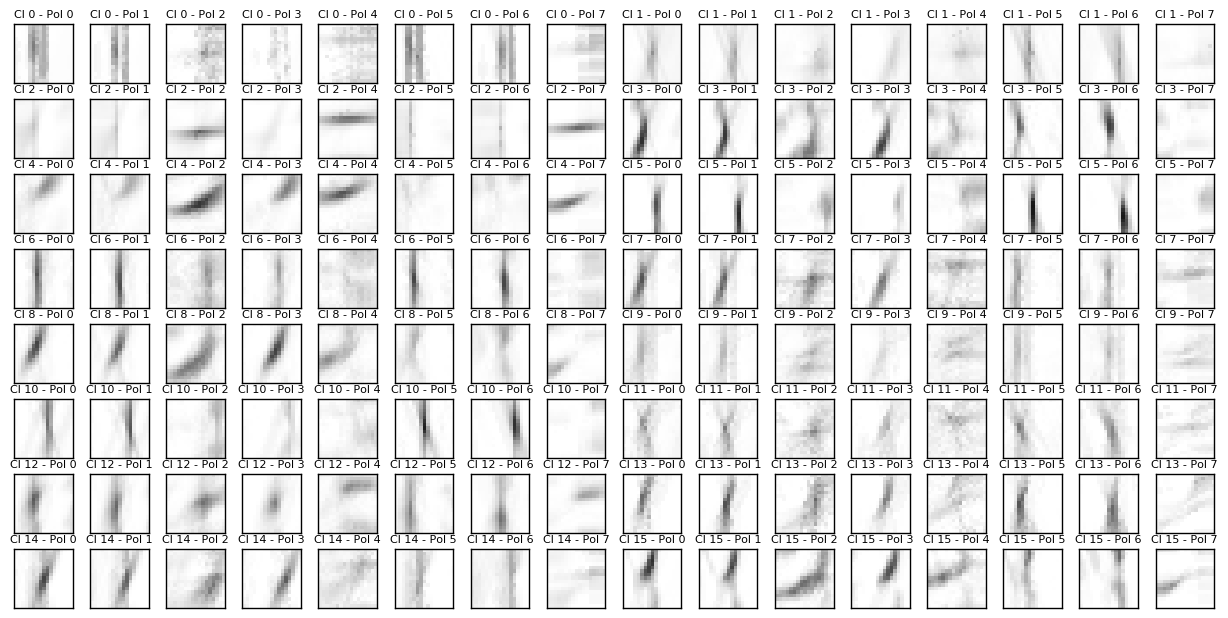

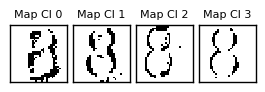

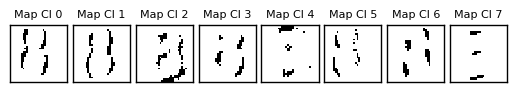

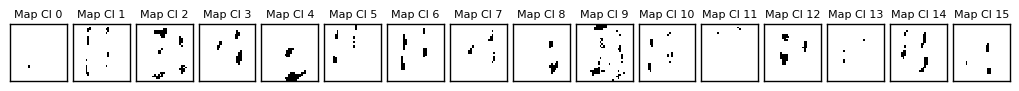

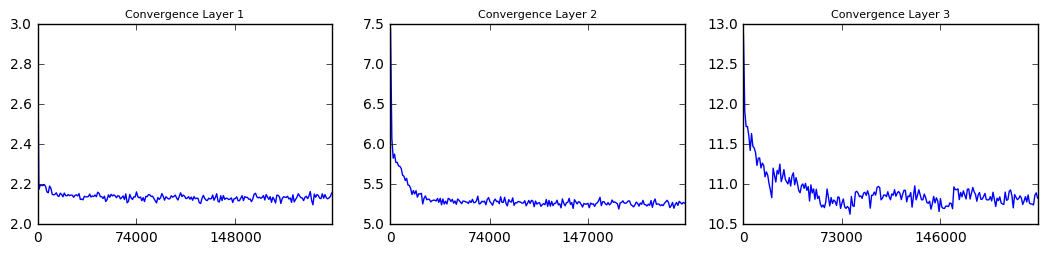

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp3 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) + 1 Polarity in Input + 3 Cycles

In [8]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = True, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_02_MaroKmeans/Exp3_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_02_MaroKmeans/Exp3_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 95.00% 
 Normalized Norm 95.00%             
 BattachaNorm 95.00%


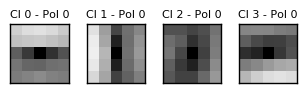

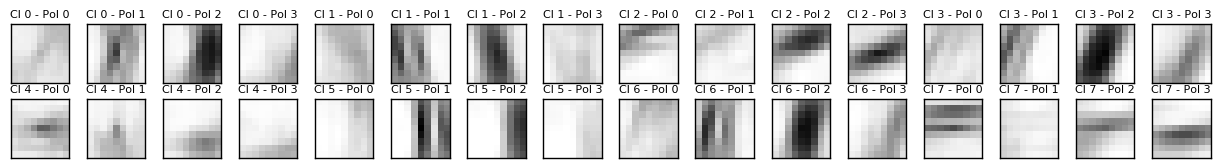

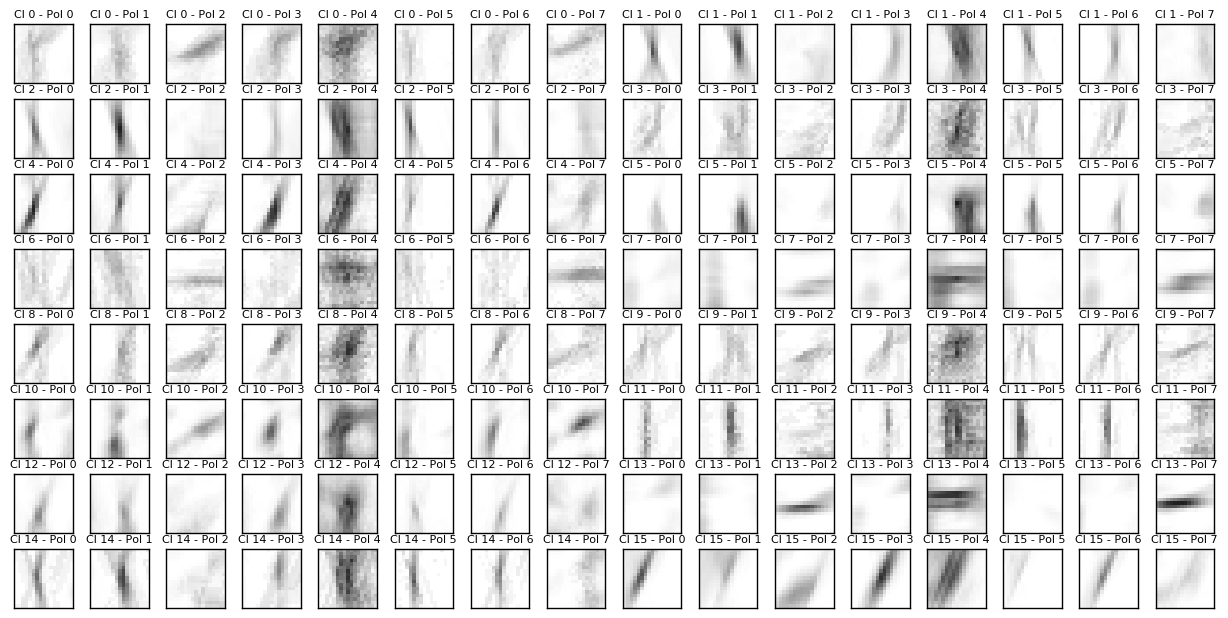

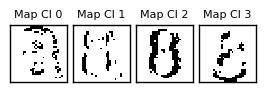

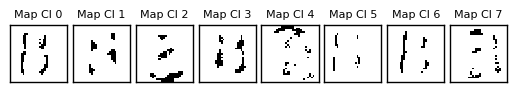

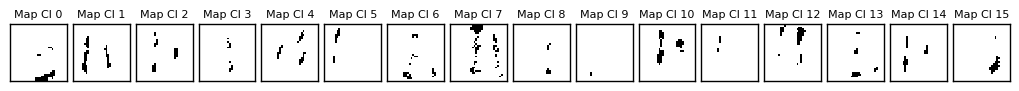

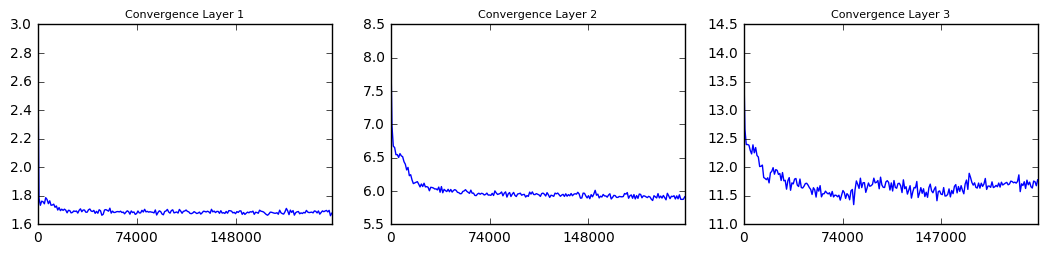

In [9]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=1, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=True)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)

## Exp4 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [10]:
save_exp = True
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(NbTrainingData=36, NbTestingData=40,
                                                        Path=DataPath, LabelPath=LabelPath,
                                                        ClusteringData=[1, 32, 19, 22, 29],
                                                        OutOnePolarity = False, verbose=0)
## Defining the network
L1 = ClusteringLayer(tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0, ThrFilter=2, LearningAlgo='maro',kernel='exponential')
Net = Network([L1,L2,L3])

if save_exp == True :
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(event = event_cl,nb_cluster=nb_cluster, KN=KN,
                                                 record_each=1000, NbCycle=3)

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, ClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, ClusterList=ClusterLayer)

    Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te)

    eucli,norma,battach,accu = Classif0.HistogramDistance()
    
    SaveObject([ClusterLayer,Classif0],'../Records/EXP_02_MaroKmeans/Exp4_2017_10_18.pkl')
    
else : 
    ClusterLayer,Classif0 = LoadObject('../Records/EXP_02_MaroKmeans/Exp4_2017_10_18.pkl')
    eucli,norma,battach,accu = Classif0.HistogramDistance()

Classification Accuracy : 
 Euclidian Norm 95.00% 
 Normalized Norm 95.00%             
 BattachaNorm 95.00%


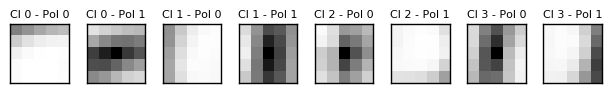

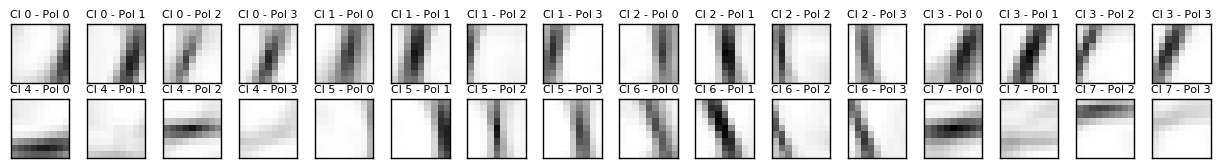

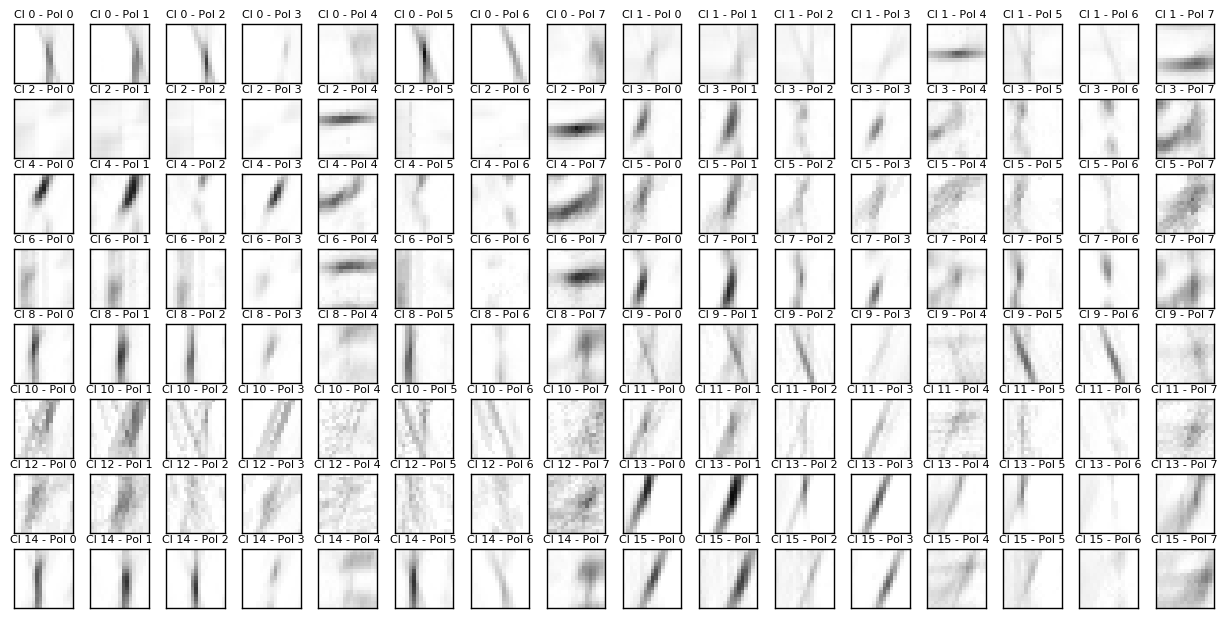

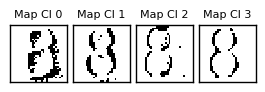

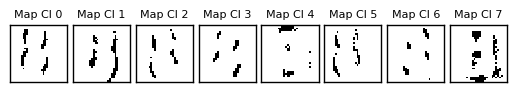

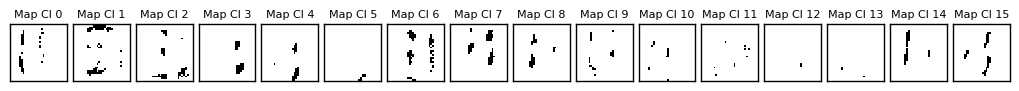

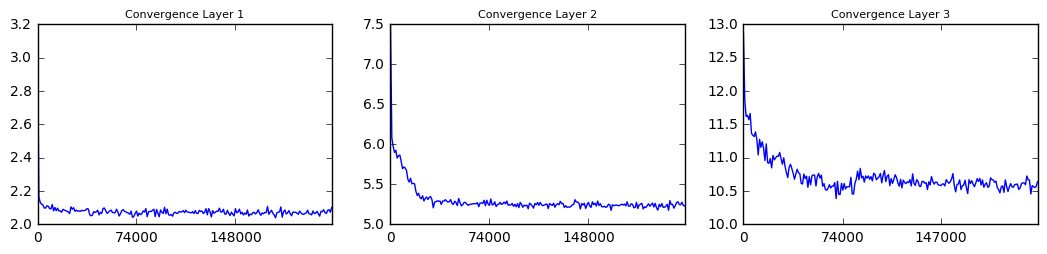

In [11]:
DisplaySurface2D(ClusterLayer[0].prototype,nb_polarities=2, scale=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4, scale=2)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8, scale=2)
event_to_show = Event(ImageSize=(32,32), ListPolarities=[-1,1],OutOnePolarity=False)
event_to_show.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=22)
Net.RunNetwork(event_to_show, ClusterList=ClusterLayer)
mapL1 = GenerateAM(Net.Layers[0].output,ClusterLayer[0],nb_image=0)
DisplayAM(mapL1,scale=2)
mapL2 = GenerateAM(Net.Layers[1].output,ClusterLayer[1],nb_image=0)
DisplayAM(mapL2,scale=2)
mapL3 = GenerateAM(Net.Layers[2].output,ClusterLayer[2],nb_image=0)
DisplayAM(mapL3,scale=2)

DisplayConvergence(ClusterLayer)